# 프로젝트1 : 주문서 정리 

월별로 시트가 구분되어 있는 매출 데이터를 요약하여 정리한다.  

데이터 병합 > 포맷 통일 및 변수 추가 > 월별 매출 추이 파악 > 조건에 따른 판매 통계 분석 > 충성 고객 파악  


In [1]:
import pandas as pd
import os
os.chdir(r"/Users/Angela/Desktop/과속대학쿠쿠루/1. 데이터 핸들링/데이터")

## Step 1. 데이터 병합하기

하나의 데이터가 12개의 시트로 구분되어 있어, 효과적인 분석을 위해 통합해야 한다. 또한, 분석에 불필요한 부분(셀)이 있어 이를 제거해야 한다.  

### 1. 시트명을 정의하여 각 시트명을 바탕으로 데이터를 불러오도록 한다.  


In [2]:
# 시트명

sheet_names = [str(i+1) + '월' for i in range(12)]
sheet_names

['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']

### 2. 데이터를 시트별로 불러와서 한 데이터 프레임에 모은다

In [3]:
# concat 이용
merged_df = pd.DataFrame()
for sn in sheet_names:
    df = pd.read_excel('월별매출데이터.xlsx', sheet_name = sn, 
                       skiprows = range(6)).iloc[:, 1:]
    merged_df = pd.concat([merged_df, df], axis = 0, ignore_index = True)

merged_df['일자']

0          2018.1.1
1          2018.1.1
2          2018.1.1
3          2018.1.1
4          2018.1.1
            ...    
18224    2018-12-31
18225    2018-12-31
18226    2018-12-31
18227    2018-12-31
18228    2018-12-31
Name: 일자, Length: 18229, dtype: object

In [4]:
merged_df.head()

,일자,지점,품명,수량,주문인 ID,수령 주소,주문 상태,결제 수단
0,2018.1.1,지점1,제품B,3,C-168,서울특별시 동작구 흑석동,주문완료,인터넷뱅킹
1,2018.1.1,지점2,제품F,8,C-87,서울특별시 서대문구 신촌동,배송완료,신용카드
2,2018.1.1,지점4,제품B,2,C-158,서울특별시 종로구 종로5가,배송완료,휴대폰결제
3,2018.1.1,지점3,제품D,7,C-307,서울특별시 서대문구 냉천동,주문완료,휴대폰결제
4,2018.1.1,지점2,제품E,9,C-342,서울특별시 종로구 묘동,배송완료,인터넷뱅킹


## Step 2. 포맷 통일 및 변수 추가



### 문자열 검색을 통해 날짜변수 포맷 통일
일자 컬럼이 .과 - 가 섞여있는 상태로 통일해야 한다.  
연도가 같으니 월 일만 추출할 수도 있다.  

- str.replace를 사용하여 '.'을 '-'로 변경 : 문자열 검색  

 
```FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.```

In [5]:
merged_df['일자'] = merged_df['일자'].str.replace('.', '-')
merged_df['일자']

/var/folders/qw/j72d9nwn5dq0vxtqtw2bbtnh0000gp/T/ipykernel_40135/1296823592.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  merged_df['일자'] = merged_df['일자'].str.replace('.', '-')


0          2018-1-1
1          2018-1-1
2          2018-1-1
3          2018-1-1
4          2018-1-1
            ...    
18224    2018-12-31
18225    2018-12-31
18226    2018-12-31
18227    2018-12-31
18228    2018-12-31
Name: 일자, Length: 18229, dtype: object

### 제품별 가격정보 불러오기

원래 데이터프레임에는 제품 이름만 있고 가격이 없다.  
$주문금액 = 수량 \times 가격 \times 1.1 (부가세)$

매출을 살피기위해 제품별 가격정보를 불러와서, 원래 데이터프레임이 이를 참조하도록 한다.  

제품에 따른 가격 정보는 제품별_가격정보.xlsx에 정의되어있다.

---

#### 새로운 문법(중요)

- `Series.to_dict()` : Series의 index를 key로, data를 value로 갖는 사전으로 변환. `_list`, `_values` 도 있다.  
- `Series.replace(dict)` : Series에 있는 값 가운데 dict의 key의 값이 있으면 대응되는 value로 변환.  
replace는 딕셔너리를 입력받기 때문에 to_dict를 사용하며, 있는 시리즈를 기반으로 무언가 값을 바꾸거나 입력하기 위해서 사용한다.  
- `DataFrame.T` : 전치행렬 반환  
- `DataFrame['new_col'] = values`(연산결과): 새로운 컬럼 추가  


In [6]:
price_df = pd.read_excel('제품별_가격정보.xlsx')
price_df

,제품,제품A,제품B,제품C,제품D,제품E,제품F
0,가격,20000,5000,10000,8000,30000,15000


In [7]:
# 제품의 이름이 인덱스로 오도록 행렬 전치
# index: 제품, 0: 가격
price_df = price_df.T
price_df

,0
제품,가격
제품A,20000
제품B,5000
제품C,10000
제품D,8000
제품E,30000
제품F,15000


인덱스로 되어있는 제품 이름을 통해 필요한 부분만 잘라내고 그를 딕셔너리로 만들어준다.  

새로운 데이터프레임의 컬럼명이 0임

In [8]:
price_df.loc['제품A':'제품F', 0]

제품A    20000
제품B     5000
제품C    10000
제품D     8000
제품E    30000
제품F    15000
Name: 0, dtype: object

In [9]:
price_dict = price_df.loc['제품A':'제품F', 0].to_dict()
price_dict

{'제품A': 20000,
 '제품B': 5000,
 '제품C': 10000,
 '제품D': 8000,
 '제품E': 30000,
 '제품F': 15000}

### 주문금액 컬럼 만들기

위에서 만든 딕셔너리로 제품 자체의 가격 컬럼과 주문금액 컬럼을 만든다.  
가격변수가 필요한 상황이 아니라면 가격변수 정의할 계산 자체를 주문금액 컬럼 만드는데 써도 좋다.  

In [10]:
merged_df['품명'].unique()

array(['제품B', '제품F', '제품D', '제품E', '제품C', '제품A'], dtype=object)

In [11]:
merged_df['가격'] = merged_df['품명'].replace(price_dict)
merged_df[['품명', '가격']]

,품명,가격
0,제품B,5000
1,제품F,15000
2,제품B,5000
3,제품D,8000
4,제품E,30000
...,...,...
18224,제품F,15000
18225,제품D,8000
18226,제품D,8000
18227,제품B,5000


In [12]:
# ndarray 브로드캐스팅 + 유니버설 함수
merged_df['주문 금액'] = merged_df['수량'] * merged_df['가격'] * 1.1 

In [13]:
merged_df.head()

,일자,지점,품명,수량,주문인 ID,수령 주소,주문 상태,결제 수단,가격,주문 금액
0,2018-1-1,지점1,제품B,3,C-168,서울특별시 동작구 흑석동,주문완료,인터넷뱅킹,5000,16500.0
1,2018-1-1,지점2,제품F,8,C-87,서울특별시 서대문구 신촌동,배송완료,신용카드,15000,132000.0
2,2018-1-1,지점4,제품B,2,C-158,서울특별시 종로구 종로5가,배송완료,휴대폰결제,5000,11000.0
3,2018-1-1,지점3,제품D,7,C-307,서울특별시 서대문구 냉천동,주문완료,휴대폰결제,8000,61600.0
4,2018-1-1,지점2,제품E,9,C-342,서울특별시 종로구 묘동,배송완료,인터넷뱅킹,30000,297000.0


## Step 3. 월별 매출 추이 파악
매출추이는 꺾은선 그래프가 가장 좋다. 시간의 흐름에 따른 변화를 읽기 좋기 떄문인듯.

일자 변수를 바탕으로 월을 추출한 뒤,  
월을 x축으로, 주문 금액 및 품목별 주문 금액을 y축으로 하는 꺾은선 그래프를 그린다.  


### 1. 월 추출

스트링 억세서인 str.split을 사용하여 자르고 필요한 컬럼인 년 '월' 일 중 월을 가져온다.  
이때 숫자 변수로 사용하기위해 int로 타입을 바꾸어준다.  

`.iloc[:, 1].astype(int)` 는 같다 이것과 -> `.[1].astype(int)`

In [14]:
merged_df['월'] = merged_df['일자'].str.split('-', 
                                           expand = True).iloc[:, 1].astype(int)
merged_df[['일자', '월']]

,일자,월
0,2018-1-1,1
1,2018-1-1,1
2,2018-1-1,1
3,2018-1-1,1
4,2018-1-1,1
...,...,...
18224,2018-12-31,12
18225,2018-12-31,12
18226,2018-12-31,12
18227,2018-12-31,12


### 2. 월과 품목에 따른 주문 금액 합산

집계함수를 사용하여 월별 주문금액을 합산한다.  
월별 제품명 별 세일즈도 함께 구해본다.  

In [15]:
df_sales = merged_df.groupby(['월'], as_index = False)['주문 금액'].sum()
df_sales.head()

,월,주문 금액
0,1,114211900.0
1,2,104314100.0
2,3,111015300.0
3,4,122255100.0
4,5,110561000.0


In [16]:
df_sales_prod = merged_df.groupby(['월', '품명'], as_index = False)['주문 금액'].sum()
df_sales_prod

,월,품명,주문 금액
0,1,제품A,7392000.0
1,1,제품B,8283000.0
2,1,제품C,18722000.0
3,1,제품D,23170400.0
4,1,제품E,32010000.0
...,...,...,...
67,12,제품B,6611000.0
68,12,제품C,20350000.0
69,12,제품D,21428000.0
70,12,제품E,29667000.0


### 3. 월별 매출 추이 시각화
마스킹 검색을 통해서 해당 월에 해당하는 제품들에 따른 매출을 가져와서 각 제품에 대한 그래프도 함께 나타나도록 한다.  

스케일이 커서 많이 떠서 보일 수도 있기에 따로 제품별 매출만 따로 보기도 해본다.  

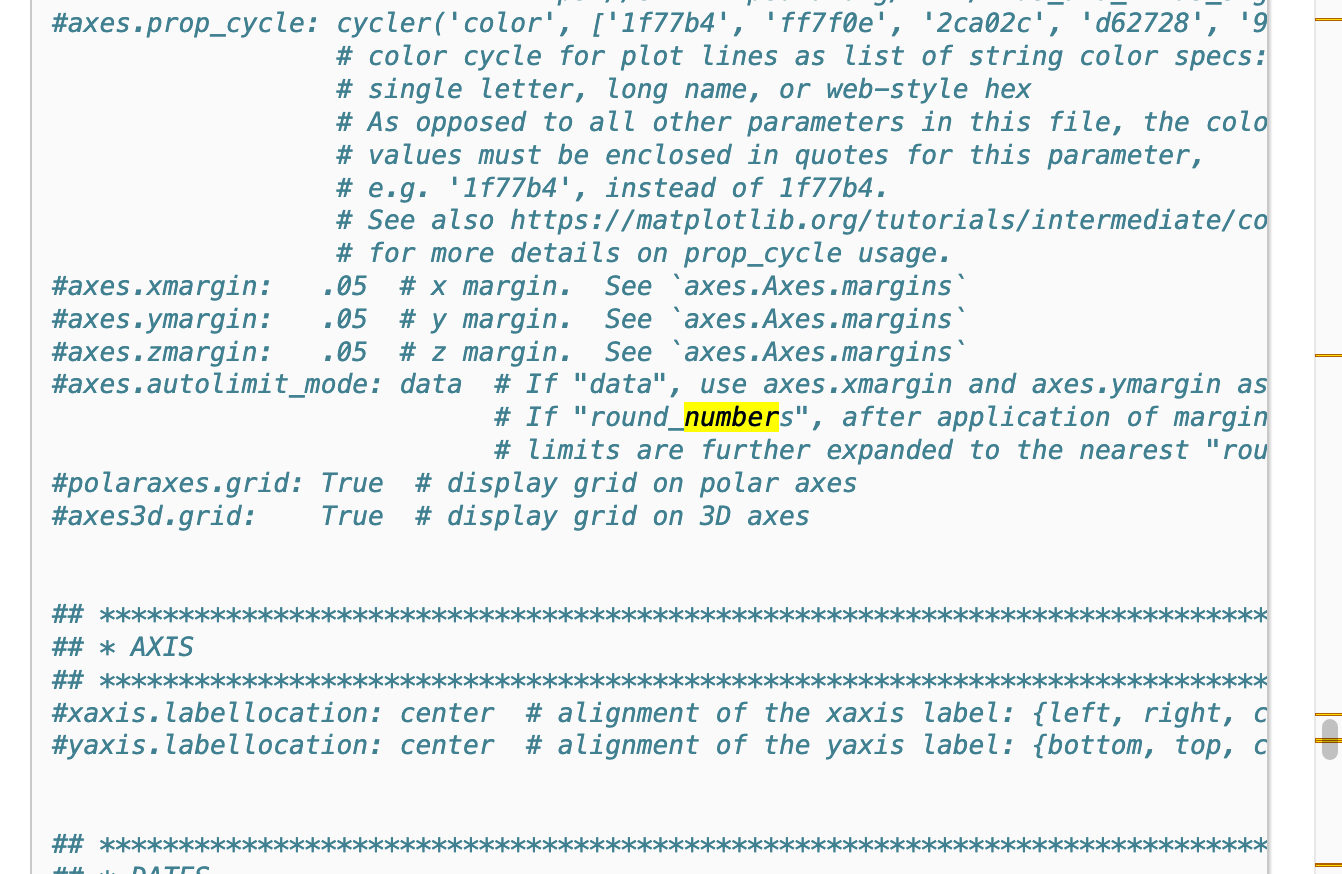

number 표현을 자꾸 잘라먹길래 공식문서를 참조하였다. (하지만 도움이 안되었다는 소식) 


---
머신러닝에서 따로 보게 되겠지만 그래프에서 감소나 증가하는 추세를 보고 새로 특징으로 추출할 수도 있다.  

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (6, 8)

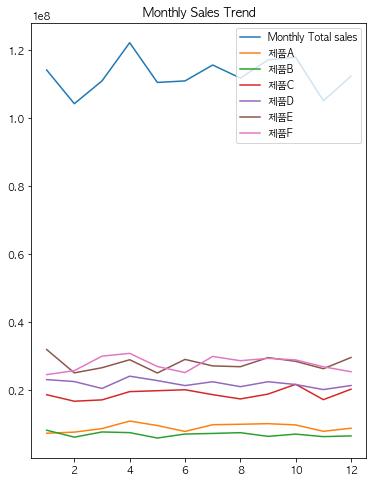

In [18]:
plt.title('Monthly Sales Trend')
plt.plot(df_sales['월'], 
         df_sales['주문 금액'],
         label = 'Monthly Total sales')

for p in df_sales_prod['품명'].unique():
    plt.plot(df_sales_prod['월'].unique(), 
             df_sales_prod.loc[df_sales_prod['품명'] == p]['주문 금액'],
             label = p)

plt.legend(loc = 'upper right',)

### 지수 표시 형식을 원래 숫자 원본 스케일대로 나타나도록 하는 코드

y축 단위 수정과 관련한 것은 이 글을 참조하였다.  
https://zephyrus1111.tistory.com/178

```
# plt.plot blabla
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
# plt.show()
```

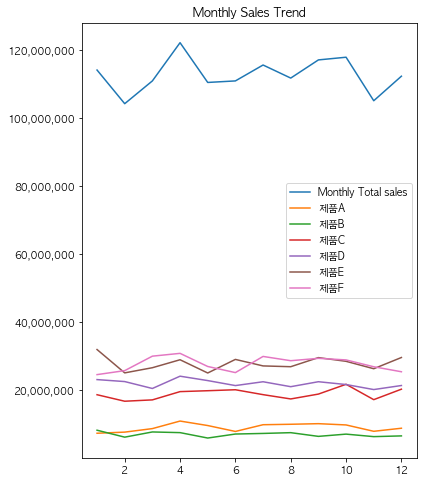

In [19]:
plt.title('Monthly Sales Trend')
plt.plot(df_sales['월'], 
         df_sales['주문 금액'],
         label = 'Monthly Total sales')

for p in df_sales_prod['품명'].unique():
    plt.plot(df_sales_prod['월'].unique(), 
             df_sales_prod.loc[df_sales_prod['품명'] == p]['주문 금액'],
             label = p)

# 천단위 콤마 표기
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.legend(loc = 'best',)

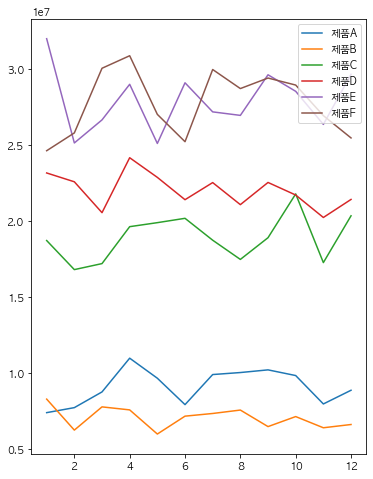

In [20]:
for product in df_sales_prod['품명'].unique():
    plt.plot(df_sales_prod['월'].unique(), # 월의 개수가 12 * 품목 개수라는 것에 주의
             df_sales_prod.loc[df_sales_prod['품명'] == product]['주문 금액'], # 마스킹 검색            
             label = product)

plt.legend(loc = 'upper right')

## Step 4. 다양한 조건에 따른 판매 통계 분석

제품별 판매 수량 합계를 나타내는 막대 그래프와 제품과 결제 수단에 따른 히트맵을 그린다.  


### 제품별 판매 수량 통계

<BarContainer object of 6 artists>

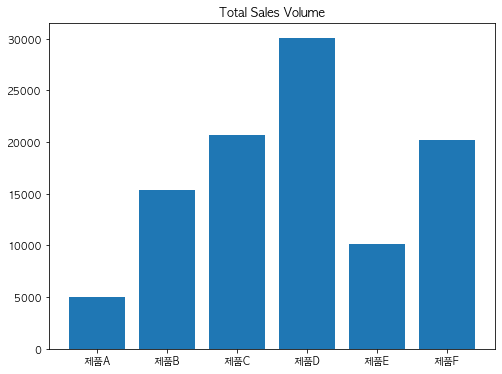

In [21]:
plt.rcParams["figure.figsize"] = (8, 6)

df_prod = merged_df.groupby(['품명'], as_index = False)['수량'].sum()

plt.title('Total Sales Volume')
plt.bar(df_prod['품명'], df_prod['수량'])

### 제품과 결제 수단에 따른 매출 분석

히트맵을 손쉽게 그리는 plt.pcolor (seaborn.heatmap()과 같은 역할) 을 사용한다.  

In [22]:
df_prod_payment = pd.pivot_table(merged_df, index = '품명', columns = '결제 수단',
                                values = '주문 금액')
df_prod_payment

결제 수단,무통장입금,신용카드,인터넷뱅킹,휴대폰결제
품명,,,,
제품A,119044.444444,130730.769231,118383.783784,130149.532710
제품B,31396.678967,30974.603175,31184.294872,30356.589147
제품C,58494.791667,59329.613095,60252.252252,62119.289340
제품D,49949.734513,48474.183351,48494.623656,49720.000000
제품E,188229.050279,184311.897106,186773.607748,200012.195122
제품F,93805.555556,90812.500000,92334.296724,91058.823529


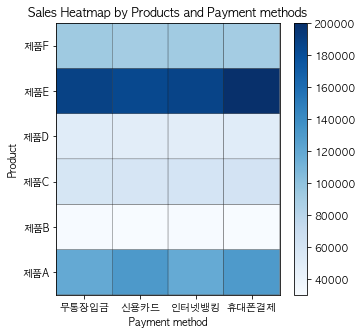

In [23]:
plt.rcParams['figure.figsize'] = (5, 5)

import numpy as np

plt.title('Sales Heatmap by Products and Payment methods')
plt.xlabel('Payment method')
plt.ylabel('Product')

plt.xticks(np.arange(0.5, len(df_prod_payment.columns)), df_prod_payment.columns)
plt.yticks(np.arange(0.5, len(df_prod_payment.index)), df_prod_payment.index)

plt.pcolor(df_prod_payment, edgecolors = 'black', cmap = plt.cm.Blues)
plt.colorbar()

plt.show()

아래 셀이 원래 제공되었던 실습코드이나 눈금에서 개수가 안맞다는 오류를 자꾸 반환해서 len을 지웠더니 잘 되었다. 

In [24]:
# plt.rcParams["figure.figsize"] = (10, 10)

# import numpy as np
# plt.xlabel('결제 수단')
# plt.ylabel('품명')

# # 눈금에 컬럼들을 라벨로 붙이기
# plt.xticks(np.arange(0.5, len(df_prod_payment.columns) + 1), df_prod_payment.columns)
# plt.yticks(np.arange(0.5, len(df_prod_payment.index) + 1), df_prod_payment.index)

# plt.pcolor(pivot_df, edgecolors = 'black', cmap = plt.cm.Reds)
# plt.colorbar()

## Step 5. 충성 고객 찾기

주문 금액합과 빈도가 각각 상위 10퍼센트 안에 속하는 고객을 찾아 정리해 본다.  

- 백분위수를 구할 수 있는 quantile을 사용하면 될 것!  
- (실수) agg를 하는데 보고자 하는 컬럼에도 리스트로 감싸져 있으면 멀티 컬럼(?) 이 되어버린다. 주의!


In [25]:
df_cus_sales = merged_df.groupby('주문인 ID')[['주문 금액']].count()
df_cus_sales.head()

,주문 금액
주문인 ID,
C-0,34
C-1,36
C-10,34
C-100,46
C-101,32


In [26]:
df_cus_sales = merged_df.groupby('주문인 ID')['주문 금액'].agg(['sum', 'count'])
df_cus_sales.head()

,sum,count
주문인 ID,,
C-0,1822700.0,34
C-1,2779700.0,36
C-10,2774200.0,34
C-100,3950100.0,46
C-101,2922700.0,32


상위 10% 라는 기준을 만들어준다.   
일정 금액, 일정 개수 이상이면 상위 10%인 것으로 백분위수를 구한다.

In [27]:
threshold_sum = df_cus_sales['sum'].quantile(0.9)
threshold_count = df_cus_sales['count'].quantile(0.9)

print(threshold_sum, threshold_count)

3506800.0 44.10000000000002


In [28]:
cond_sum = df_cus_sales['sum'] >= threshold_sum
cond_count = df_cus_sales['count'] >= threshold_count

df_cus_sales.loc[cond_sum & cond_count].sort_values(by = ['sum', 'count'], 
                                                      ascending = False).head(10)

,sum,count
주문인 ID,,
C-450,4759700.0,51
C-288,4640900.0,50
C-320,4313100.0,63
C-106,4276800.0,46
C-189,4250400.0,49
C-389,4171200.0,47
C-475,4012800.0,46
C-439,3972100.0,50
C-100,3950100.0,46
